In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import statsmodels.api as sm
pd.set_option('display.max_colwidth',1000)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('violent_crime.csv')

In [3]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

In [4]:
df

,case_number,date,block,primary_type,unique_id,zip_code,ward,community_area,street_outreach_organization,area,district,beat,age,sex,race,fbi_cd,fbi_descr,iucr_cd,iucr_secondary,month,day_of_week,hour,latitude,longitude,location
0,HZ100096,01/01/2016 02:04:00 AM,4600 S ST LAWRENCE,FATAL SHOOTING,HOM-HZ100096-1,60653,4,GRAND BOULEVARD,None,1,2,221,20 - 29,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,2,41.810127,-87.611604,POINT (-87.611604058699 41.810126904142)
1,HZ100342,01/01/2016 06:39:00 AM,1900 W GARFIELD BLVD,FATAL SHOOTING,HOM-HZ100342-1,60609,16,NEW CITY,PBMR New City,1,9,932,30 - 39,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,6,41.794218,-87.673175,POINT (-87.67317465388 41.794218345858)
2,HZ101042,01/01/2016 10:06:00 PM,6100 S SANGAMON ST,FATAL SHOOTING,HOM-HZ101042-1,60621,16,ENGLEWOOD,TADC Englewood | READI 60621,1,7,712,30 - 39,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,22,41.782338,-87.647905,POINT (-87.64790465388 41.782338345858)
3,HZ101842,01/02/2016 04:40:00 PM,6300 S STONY ISLAND,FATAL SHOOTING,HOM-HZ101842-1,60637,20,WOODLAWN,Project H.O.O.D. Woodlawn,1,3,314,0 - 19,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,7,16,41.780618,-87.586165,POINT (-87.58616465388 41.780618345858)
4,HZ103309,01/04/2016 08:22:00 AM,400 N CENTRAL AVE,FATAL SHOOTING,HOM-HZ103309-1,60644,37,AUSTIN,READI 60644 | INVC Austin,4,15,1523,20 - 29,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,2,8,41.888383,-87.765249,POINT (-87.765249058699 41.888383095858)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20031,JE266314,06/14/2021 10:32:00 PM,7300 S MOZART ST,NON-FATAL SHOOTING,SHOOT-JE266314-1,60629,18,CHICAGO LAWN,None,1,8,835,20 - 29,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED - HANDGUN,6,2,22,41.760197,-87.694021,POINT (-87.694020941301 41.760196904142)
20032,JE289151,07/03/2021 11:49:00 PM,1000 W 89TH ST,NON-FATAL SHOOTING,SHOOT-JE289151-1,60620,21,AUBURN GRESHAM,Acclivus Washington Heights,2,22,2222,40 - 49,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED - HANDGUN,7,7,23,41.733063,-87.649051,POINT (-87.649050941301 41.733063095858)
20033,JE290206,07/04/2021 10:44:00 PM,3000 E 79TH PL,NON-FATAL SHOOTING,SHOOT-JE290206-1,60617,7,SOUTH CHICAGO,Claretian Associates South Chicago,2,4,422,40 - 49,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED - HANDGUN,7,1,22,41.750657,-87.550559,POINT (-87.550559058699 41.750656904142)
20034,JE292814,07/06/2021 10:36:00 PM,12100 S DOTY AVE,FATAL SHOOTING,HOM-JE292814-1,60628,9,RIVERDALE,None,2,5,532,0 - 19,M,BLK,00,NON-CRIMINAL,5078,INVESTIGATION,7,3,22,41.673107,-87.600781,POINT (-87.600780941301 41.673106904142)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20036 entries, 0 to 20035
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   case_number                   20036 non-null  object 
 1   date                          20036 non-null  object 
 2   block                         20036 non-null  object 
 3   primary_type                  20036 non-null  object 
 4   unique_id                     20036 non-null  object 
 5   zip_code                      20036 non-null  int64  
 6   ward                          20036 non-null  int64  
 7   community_area                20036 non-null  object 
 8   street_outreach_organization  20036 non-null  object 
 9   area                          20036 non-null  int64  
 10  district                      20036 non-null  int64  
 11  beat                          20036 non-null  int64  
 12  age                           19801 non-null  object 
 13  s

In [6]:
df['age'].fillna('UNKNOWN', inplace=True)
df['sex'].fillna('UNKNOWN', inplace=True)
df['race'].fillna('(NOT PROVIDED)', inplace=True)

In [7]:
df['iucr_secondary'].replace(' -', ':', inplace=True, regex=True)
df['sex'].replace(['UNKNOWN','X', '(NOT PROVIDED)'], 'SEX_UNKNOWN', inplace=True)

In [8]:
df['sex'].unique()

array(['M', 'F', 'SEX_UNKNOWN'], dtype=object)

In [9]:
df['iucr_secondary'].value_counts()

AGGRAVATED: HANDGUN                           15415
FIRST DEGREE MURDER                            3599
ARMED: HANDGUN                                  376
ATTEMPT: ARMED-HANDGUN                          192
AGGRAVATED: OTHER FIREARM                       123
AGGRAVATED DOMESTIC BATTERY: HANDGUN             92
ATTEMPT ARMED: HANDGUN                           86
SECOND DEGREE MURDER                             38
AGGRAVATED VEHICULAR HIJACKING                   31
AGGRAVATED POLICE OFFICER: HANDGUN               21
AGGRAVATED PO: HANDGUN                           18
AGGRAVATED                                        8
INVESTIGATION                                     5
VEHICULAR HIJACKING                               4
ATTEMPT AGGRAVATED                                4
ATTEMPT ARMED: OTHER FIREARM                      3
ATTEMPT: AGGRAVATED                               3
ARMED: OTHER FIREARM                              3
AGGRAVATED POLICE OFFICER: OTHER FIREARM          3
DEATH: OFFIC

In [10]:
def help_available(string):
    if string == 'None':
        return 'no'
    else:
        return 'yes'

In [11]:
df['so_yes_no'] = df['street_outreach_organization'].map(help_available)
df['so_yes_no']

0         no
1        yes
2        yes
3        yes
4        yes
        ... 
20031     no
20032    yes
20033    yes
20034     no
20035     no
Name: so_yes_no, Length: 20036, dtype: object

In [12]:
df['street_outreach_organization'].value_counts().head(40)

None                                                                     5100
READI 60644 | INVC Austin                                                1132
UCAN North Lawndale | READI 60623                                         875
TADC Englewood | READI 60621                                              864
ALSO Humboldt Park                                                        825
READI 60624 | INVC West Garfield Park                                     808
TADC West Englewood | READI 60631                                         683
INVC Austin                                                               589
Claretian Associates South Shore                                          515
SWOP Chicago Lawn                                                         467
PBMR New City                                                             461
Acclivus Greater Grand Crossing                                           433
READI 60623 | New Life Centers South Lawndale | Enlace South Law

In [13]:
df['so_yes_no'].value_counts()

yes    14936
no      5100
Name: so_yes_no, dtype: int64

In [14]:
df['sex'].value_counts()

M              17261
F               2530
SEX_UNKNOWN      245
Name: sex, dtype: int64

In [15]:
df['age'].unique()

array(['20 - 29', '30 - 39', '0 - 19', '70 - 79', '40 - 49', '50 - 59',
       '60 - 69', '80+', 'UNKNOWN'], dtype=object)

In [16]:
df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M')
df.head()

,case_number,date,block,primary_type,unique_id,zip_code,ward,community_area,street_outreach_organization,area,district,beat,age,sex,race,fbi_cd,fbi_descr,iucr_cd,iucr_secondary,month,day_of_week,hour,latitude,longitude,location,so_yes_no,month_year
0,HZ100096,01/01/2016 02:04:00 AM,4600 S ST LAWRENCE,FATAL SHOOTING,HOM-HZ100096-1,60653,4,GRAND BOULEVARD,None,1,2,221,20 - 29,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,2,41.810127,-87.611604,POINT (-87.611604058699 41.810126904142),no,2016-01
1,HZ100342,01/01/2016 06:39:00 AM,1900 W GARFIELD BLVD,FATAL SHOOTING,HOM-HZ100342-1,60609,16,NEW CITY,PBMR New City,1,9,932,30 - 39,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,6,41.794218,-87.673175,POINT (-87.67317465388 41.794218345858),yes,2016-01
2,HZ101042,01/01/2016 10:06:00 PM,6100 S SANGAMON ST,FATAL SHOOTING,HOM-HZ101042-1,60621,16,ENGLEWOOD,TADC Englewood | READI 60621,1,7,712,30 - 39,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,22,41.782338,-87.647905,POINT (-87.64790465388 41.782338345858),yes,2016-01
3,HZ101842,01/02/2016 04:40:00 PM,6300 S STONY ISLAND,FATAL SHOOTING,HOM-HZ101842-1,60637,20,WOODLAWN,Project H.O.O.D. Woodlawn,1,3,314,0 - 19,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,7,16,41.780618,-87.586165,POINT (-87.58616465388 41.780618345858),yes,2016-01
4,HZ103309,01/04/2016 08:22:00 AM,400 N CENTRAL AVE,FATAL SHOOTING,HOM-HZ103309-1,60644,37,AUSTIN,READI 60644 | INVC Austin,4,15,1523,20 - 29,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,2,8,41.888383,-87.765249,POINT (-87.765249058699 41.888383095858),yes,2016-01


In [17]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.to_period('D')

In [18]:
df_dow = df.groupby('day_of_week').count()
df_dow

,case_number,date,block,primary_type,unique_id,zip_code,ward,community_area,street_outreach_organization,area,district,beat,age,sex,race,fbi_cd,fbi_descr,iucr_cd,iucr_secondary,month,hour,latitude,longitude,location,so_yes_no,month_year
day_of_week,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923
2,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656
3,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439
4,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376
5,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255
6,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645
7,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742


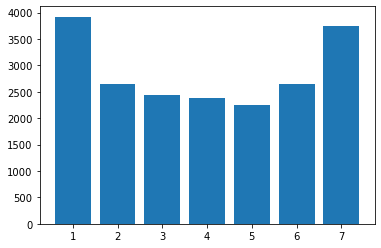

In [19]:
plt.bar(df_dow.index, df_dow['unique_id']);
# 1 Sun, 2 Mon etc

In [20]:
def cat_encoder(category, enc_df):
    ohe = OneHotEncoder(handle_unknown='error', sparse=False)
    
    # 
    temp_df = enc_df[[category]]
    ohe.fit(temp_df)

    cat_encoded = pd.DataFrame(ohe.transform(temp_df).astype(int), \
                               columns=(category+'_'+ohe.categories_[0]))
    return cat_encoded

In [21]:
df['primary_type'].replace(['NON-SHOOTING HOMICIDE', 'FATAL SHOOTING'], 'fatal', inplace=True)
df['primary_type'].replace(['NON-FATAL SHOOTING'], 'non_fatal', inplace=True)

In [22]:
df = df[df['date'] < '2020-01-01']

In [23]:
df.reset_index(inplace=True)

In [24]:
model_vars = ['date', 'primary_type', 'so_yes_no', 'day_of_week']
model_df = df[model_vars]
model_df = model_df.astype(str)

In [25]:
need_enc = list(model_df.columns[1:])

In [26]:
for col in need_enc:
    loop_df = cat_encoder(str(col), model_df)
    model_df = pd.concat([model_df, loop_df], axis=1)

In [27]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13618 entries, 0 to 13617
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    13618 non-null  object
 1   primary_type            13618 non-null  object
 2   so_yes_no               13618 non-null  object
 3   day_of_week             13618 non-null  object
 4   primary_type_fatal      13618 non-null  int64 
 5   primary_type_non_fatal  13618 non-null  int64 
 6   so_yes_no_no            13618 non-null  int64 
 7   so_yes_no_yes           13618 non-null  int64 
 8   day_of_week_1           13618 non-null  int64 
 9   day_of_week_2           13618 non-null  int64 
 10  day_of_week_3           13618 non-null  int64 
 11  day_of_week_4           13618 non-null  int64 
 12  day_of_week_5           13618 non-null  int64 
 13  day_of_week_6           13618 non-null  int64 
 14  day_of_week_7           13618 non-null  int64 
dtypes:

In [28]:
######################


#####################

In [29]:
model_df

,date,primary_type,so_yes_no,day_of_week,primary_type_fatal,primary_type_non_fatal,so_yes_no_no,so_yes_no_yes,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7
0,2016-01-01,fatal,no,6,1,0,1,0,0,0,0,0,0,1,0
1,2016-01-01,fatal,yes,6,1,0,0,1,0,0,0,0,0,1,0
2,2016-01-01,fatal,yes,6,1,0,0,1,0,0,0,0,0,1,0
3,2016-01-02,fatal,yes,7,1,0,0,1,0,0,0,0,0,0,1
4,2016-01-04,fatal,yes,2,1,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13613,2018-01-21,non_fatal,no,1,0,1,1,0,1,0,0,0,0,0,0
13614,2017-06-17,fatal,yes,7,1,0,0,1,0,0,0,0,0,0,1
13615,2016-09-15,non_fatal,no,5,0,1,1,0,0,0,0,0,1,0,0
13616,2017-07-07,non_fatal,yes,6,0,1,0,1,0,0,0,0,0,1,0


In [30]:
model_df = model_df.groupby('date').sum()

In [31]:
def binary_maker(num):
    if num > 0:
        return 1
    else:
        return 0

In [32]:
for col in model_df.columns:
    if 'day' in col or 'month' in col:
        model_df[col] = model_df[col].map(binary_maker)

In [33]:
target = model_df['primary_type_fatal'] + model_df['primary_type_non_fatal'][7:]
target

date
2016-01-01     NaN
2016-01-02     NaN
2016-01-03     NaN
2016-01-04     NaN
2016-01-05     NaN
              ... 
2019-12-27    11.0
2019-12-28    10.0
2019-12-29     8.0
2019-12-30     5.0
2019-12-31     8.0
Length: 1458, dtype: float64

In [34]:
time_list = []

for col in model_df.columns:
    if 'day' in col or 'month' in col:
        time_list.append(col)
        
time_df = model_df[time_list]

In [35]:
for col in time_df:
    time_df[col] = time_df[col].map(binary_maker)

time_df = time_df[7:]

<ipython-input-35-7975841872c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df[col] = time_df[col].map(binary_maker)


In [36]:
# model_df.set_index('date', inplace=True)
model_df = model_df[['primary_type_fatal', 'primary_type_non_fatal', 'so_yes_no_yes', 'so_yes_no_no']]
model_df = model_df.rolling(window=7).sum()
model_df = model_df[7:]
model_df = pd.concat([model_df, time_df], axis=1)

In [37]:
# model_df.drop('month_year_2016-01', axis=1, inplace=True)
model_df.drop('day_of_week_7', axis=1, inplace=True)

In [38]:
model = LinearRegression()

X = model_df
y = target[7:]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

model.fit(X_train, y_train)

LinearRegression()

In [40]:
model.score(X_train, y_train)

0.4891624714635643

In [41]:
model.score(X_test, y_test)

0.48024895307851834

In [42]:
sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     122.4
Date:                Thu, 22 Jul 2021   Prob (F-statistic):          5.99e-161
Time:                        15:31:45   Log-Likelihood:                -3237.0
No. Observations:                1160   AIC:                             6494.
Df Residuals:                    1150   BIC:                             6545.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3.0053      0.461      6.518      0.000       2.101       3.910
primary_type_fatal         0.0783      0.023      3.468      0.001       0.034       0.123
primary_type_non_fatal     0.0689      0.012      5.873      0.000       0.046       0.092
so_yes_no_yes              0.0740      0.012      6.402      0.000       0.051       0.097
so_yes_no_no               0.0731      0.018      4.149      0.000       0.039       0.108
day_of_week_1              0.0459      0.448      0.103      0.918      -0.832       0.924
day_of_week_2             -3.9825      0.432     -9.217      0.000      -4.830      -3.135
day_of_week_3             -4.3906      0.428    -10.250      0.000      -5.231      -3.550
day_of_week_4             -5.0113      0.431    -11.624      0.000      -5.857      -4.165
day_of_week_5             -4.9423      0.441    -11.207      0.000      -5.808      -4.077
day_of_week_6             -3.7422      0.432     -8.671      0.000      -4.589      -2.895
==============================================================================
Omnibus:                      135.184   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.433
Skew:                           0.731   Prob(JB):                     1.26e-56
Kurtosis:                       4.786   Cond. No.                     3.87e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.97e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""